In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [84]:
df = pd.read_csv('/content/drive/MyDrive/co2_emission/industrial_emissions_dataset_5000.csv')

In [85]:
df.head()

,Industry_Sector,Production_Volume_tons,Energy_Source,Fuel_Consumption_GJ,Emission_Factor_kgCO2_per_GJ,Location_Region,Year,Process_Type,Efficiency_GJ_per_ton,Total_CO2_Emissions_MtCO2,Emission_Intensity_kgCO2_per_ton
0,Power,62726.463233,Coal,369582.132618,81.232652,India-North,2023.0,Chemical Reaction,5.001403,0.030022,478.619954
1,Oil & Gas,16296.659990,Oil,281607.165735,94.500666,India-East,2022.0,Chemical Reaction,5.200457,0.026612,1632.976618
2,Chemicals,40899.495579,NaN,187833.626367,93.726707,India-South,2017.0,Mixed Process,3.722735,0.017605,430.446073
3,Oil & Gas,53169.255384,Electricity,193014.655998,NaN,India-Central,2015.0,Combustion,5.538560,0.014599,274.568156
4,NaN,68001.184346,Electricity,NaN,67.215534,India-South,2019.0,Chemical Reaction,1.716102,0.016861,247.948738


In [86]:
df.isnull().sum()/df.shape[0]*100

,0
Industry_Sector,7.96
Production_Volume_tons,7.98
Energy_Source,8.18
Fuel_Consumption_GJ,7.40
Emission_Factor_kgCO2_per_GJ,7.90
Location_Region,8.52
Year,8.16
Process_Type,7.80
Efficiency_GJ_per_ton,7.94
Total_CO2_Emissions_MtCO2,7.44


In [87]:
df.shape

(5000, 11)

In [88]:
df = df.dropna()

In [89]:
# loop through numeric columns
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())

# check null values
print(df.isnull().sum())

Industry_Sector                     0
Production_Volume_tons              0
Energy_Source                       0
Fuel_Consumption_GJ                 0
Emission_Factor_kgCO2_per_GJ        0
Location_Region                     0
Year                                0
Process_Type                        0
Efficiency_GJ_per_ton               0
Total_CO2_Emissions_MtCO2           0
Emission_Intensity_kgCO2_per_ton    0
dtype: int64


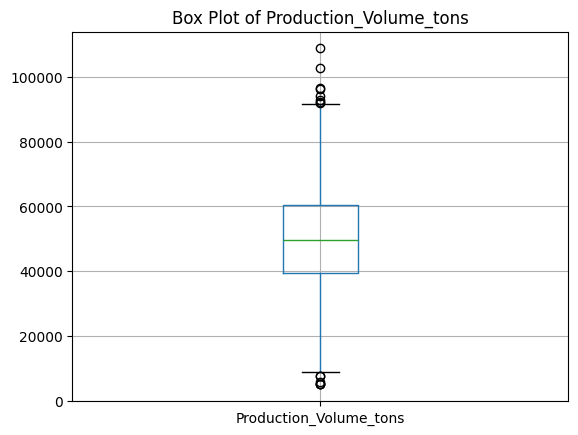

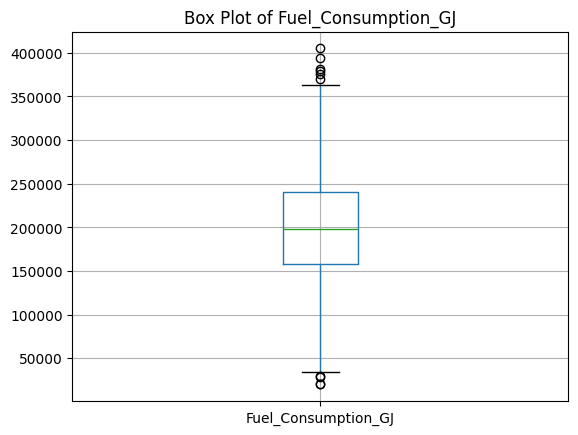

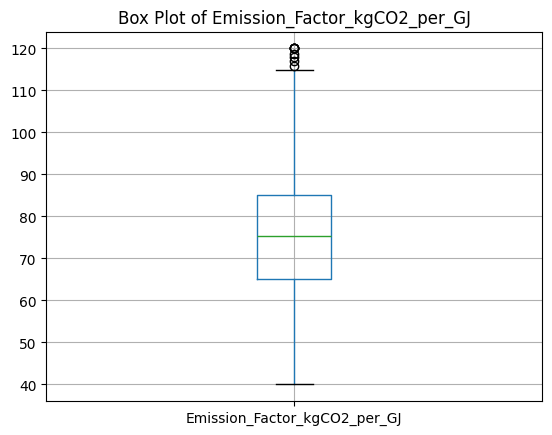

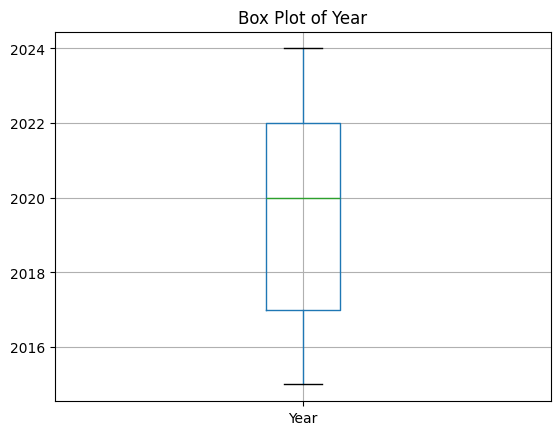

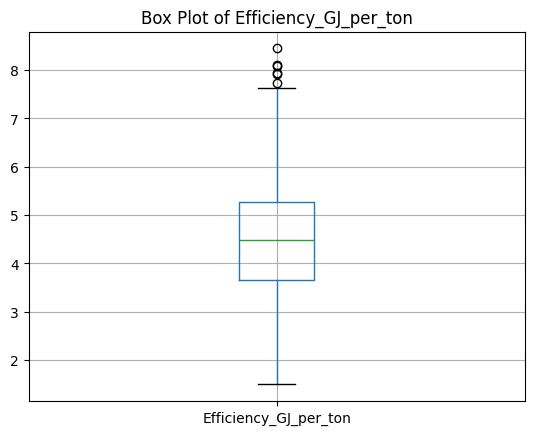

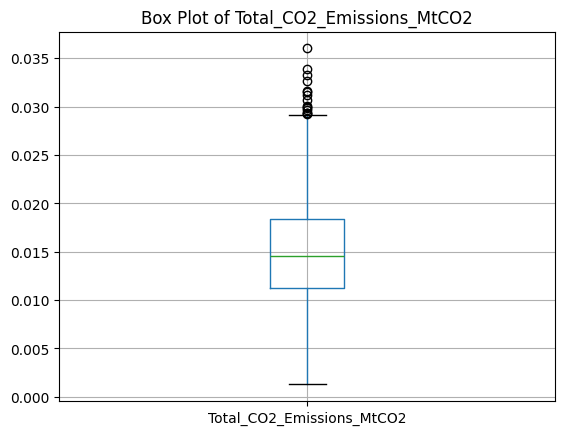

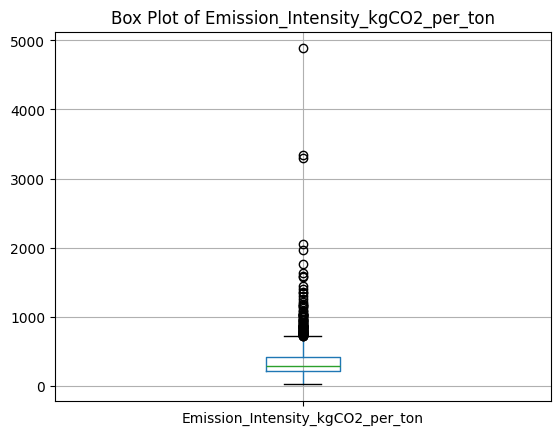

In [90]:
# select numeric columns
num_cols = df.select_dtypes(include='number').columns

# create boxplot for each column
for col in num_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

In [91]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# IQR Outlier Removal
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Reset index
df.reset_index(drop=True, inplace=True)

print("Outliers removed successfully")

Outliers removed successfully


In [92]:
df.shape

(1855, 11)

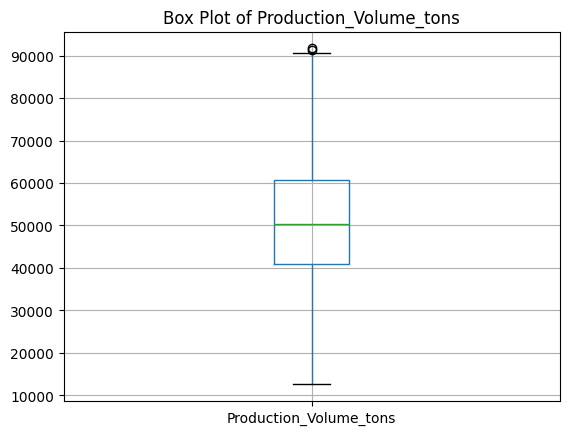

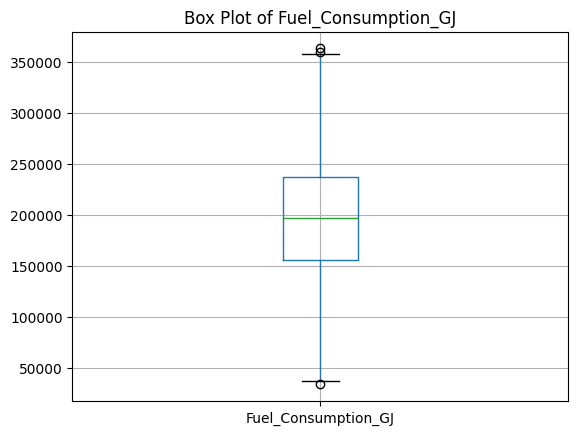

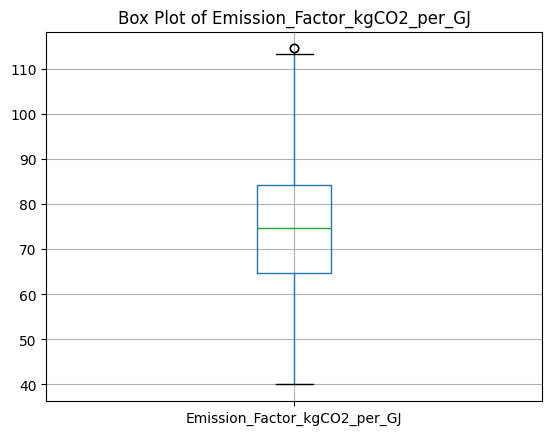

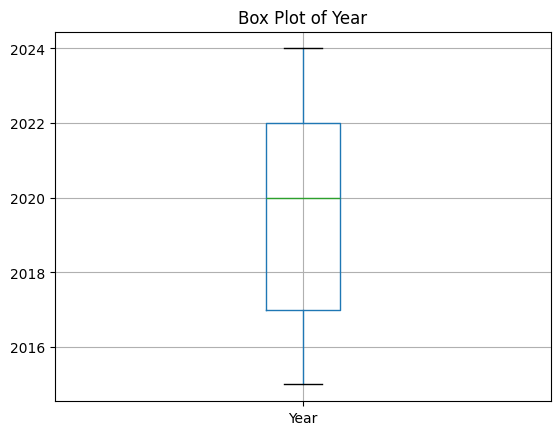

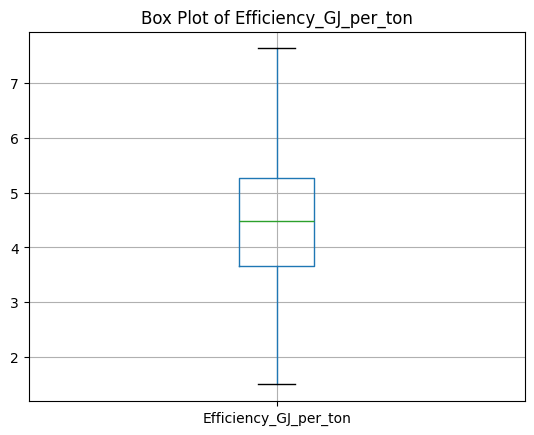

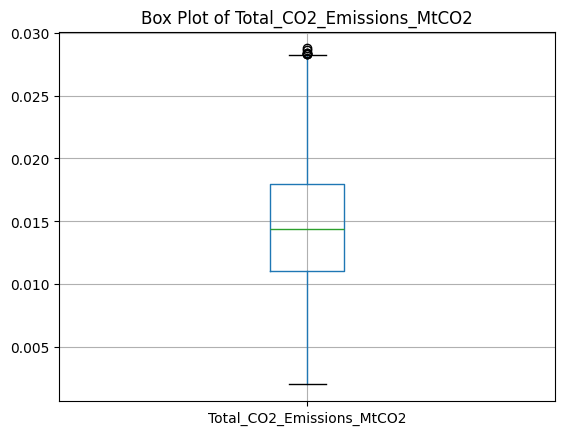

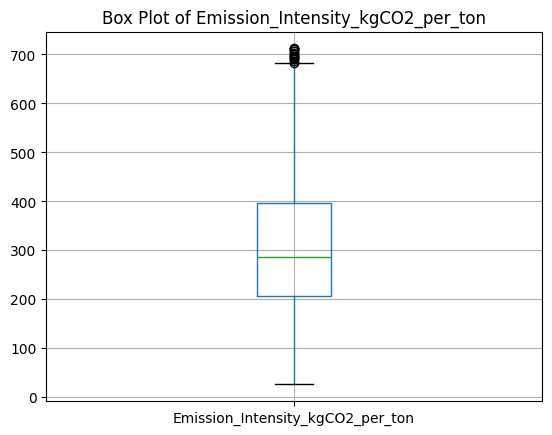

In [93]:
# select numeric columns
num_cols = df.select_dtypes(include='number').columns

# create boxplot for each column
for col in num_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

In [94]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# IQR Outlier Removal
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Reset index
df.reset_index(drop=True, inplace=True)

print("Outliers removed successfully")

Outliers removed successfully


In [95]:
df.shape

(1824, 11)

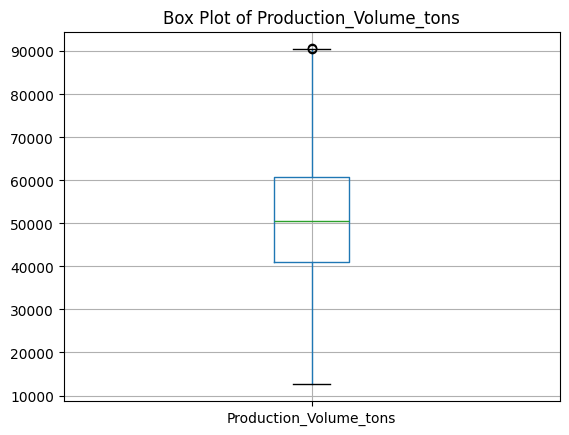

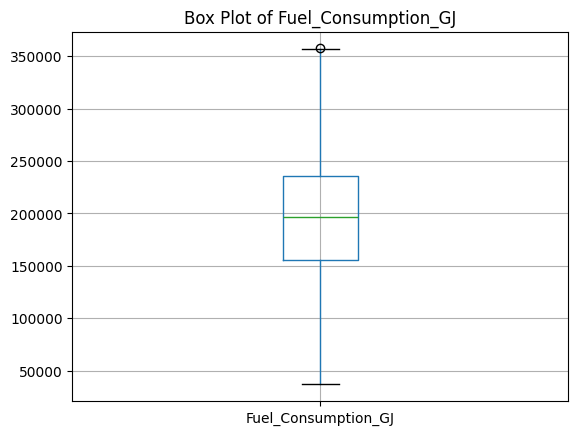

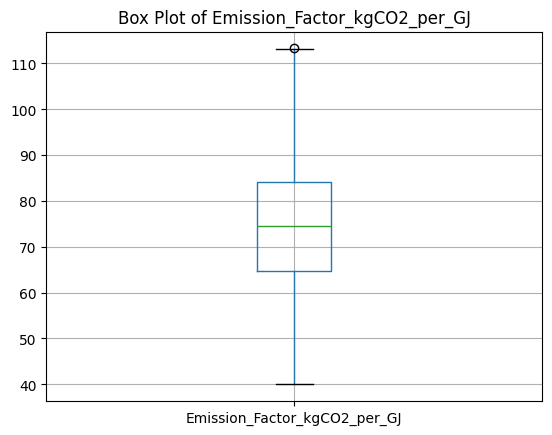

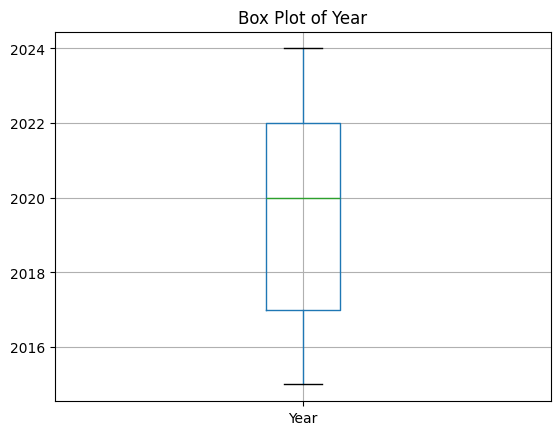

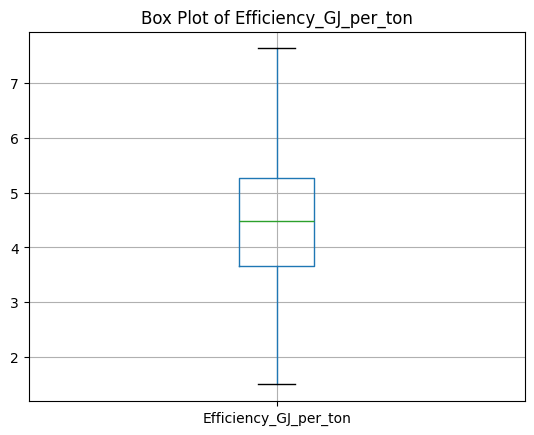

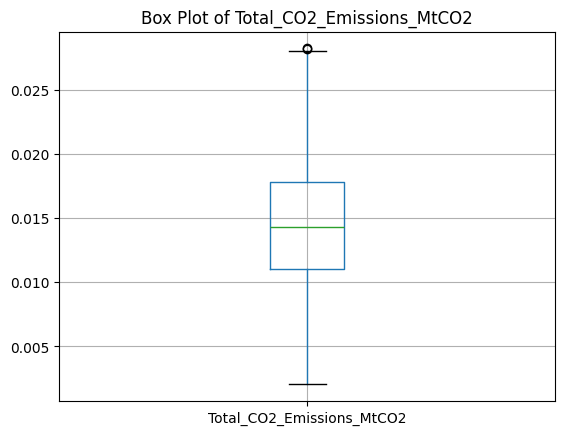

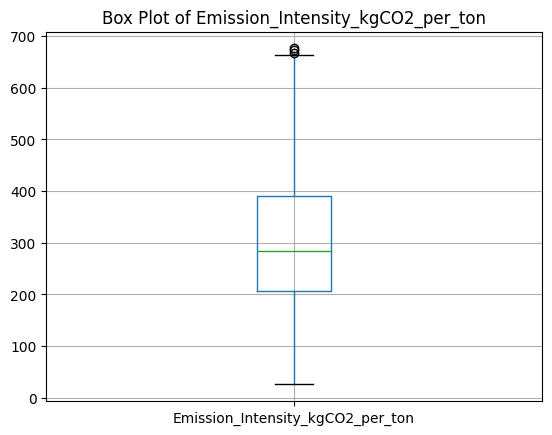

In [96]:
# select numeric columns
num_cols = df.select_dtypes(include='number').columns

# create boxplot for each column
for col in num_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

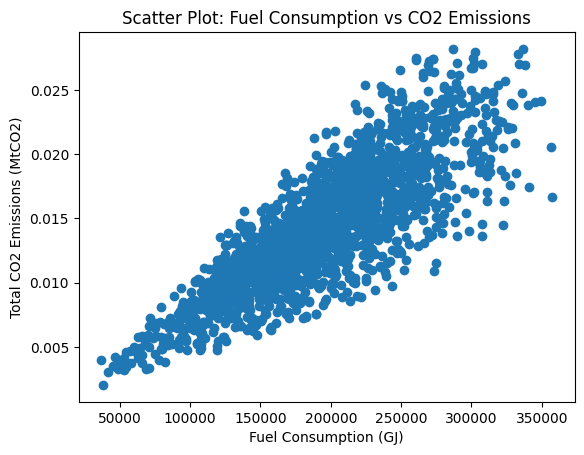

In [97]:
plt.figure()

plt.scatter(
    df['Fuel_Consumption_GJ'],
    df['Total_CO2_Emissions_MtCO2']
)

plt.xlabel('Fuel Consumption (GJ)')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.title('Scatter Plot: Fuel Consumption vs CO2 Emissions')

plt.show()


prepaer the data for ml

In [98]:
df_num = df.select_dtypes(include=['int64', 'float64'])

In [99]:
df_cat = df.select_dtypes(include=['object'])

In [100]:
df_num.head()

,Production_Volume_tons,Fuel_Consumption_GJ,Emission_Factor_kgCO2_per_GJ,Year,Efficiency_GJ_per_ton,Total_CO2_Emissions_MtCO2,Emission_Intensity_kgCO2_per_ton
0,21851.709409,142587.429357,75.766673,2019.0,5.092997,0.010803,494.394963
1,59295.671689,217852.318113,81.917076,2023.0,5.595190,0.017846,300.963364
2,40469.564168,166847.388299,65.482803,2015.0,5.408577,0.010926,269.971641
3,32155.000114,209131.986879,68.997485,2015.0,5.616512,0.014430,448.750775
4,40634.819154,197119.212012,71.725439,2023.0,4.708202,0.014138,347.939582


In [101]:
df_cat.head()

,Industry_Sector,Energy_Source,Location_Region,Process_Type
0,Chemicals,Coal,India-Central,Chemical Reaction
1,Chemicals,Electricity,India-Central,Mixed Process
2,Chemicals,Biomass,India-West,Combustion
3,Oil & Gas,Oil,India-South,Chemical Reaction
4,Power,Electricity,India-East,Chemical Reaction


In [102]:
# perform encoding on catgorical data
# perform encoding (one hot encoding)
df_encoded = pd.get_dummies(df_cat)

In [103]:
# find boolean columns
bool_cols = df_encoded.select_dtypes(include='bool').columns

# convert True/False → 1/0
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [104]:
df_encoded.head()

,Industry_Sector_Cement,Industry_Sector_Chemicals,Industry_Sector_Fertilizer,Industry_Sector_Oil & Gas,Industry_Sector_Power,Industry_Sector_Steel,Energy_Source_Biomass,Energy_Source_Coal,Energy_Source_Electricity,Energy_Source_Natural Gas,Energy_Source_Oil,Location_Region_India-Central,Location_Region_India-East,Location_Region_India-North,Location_Region_India-South,Location_Region_India-West,Process_Type_Chemical Reaction,Process_Type_Combustion,Process_Type_Mixed Process
0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [105]:
from sklearn.preprocessing import StandardScaler


# create scaler
scaler = StandardScaler()

# apply Z-score scaling
df_scaled = scaler.fit_transform(df_num)

# convert to dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df_num.columns)

df_scaled.head()

,Production_Volume_tons,Fuel_Consumption_GJ,Emission_Factor_kgCO2_per_GJ,Year,Efficiency_GJ_per_ton,Total_CO2_Emissions_MtCO2,Emission_Intensity_kgCO2_per_ton
0,-2.113824,-0.925862,0.111031,-0.186437,0.539664,-0.747571,1.473270
1,0.574390,0.373887,0.549976,1.197328,0.963211,0.669916,-0.023904
2,-0.777193,-0.506916,-0.622914,-1.570201,0.805822,-0.722963,-0.263783
3,-1.374120,0.223296,-0.372076,-1.570201,0.981194,-0.017697,1.119981
4,-0.765328,0.015848,-0.177386,1.197328,0.215129,-0.076293,0.339695


In [106]:
X = pd.concat([df_encoded,df_scaled],axis=1)
# chcek the concatinate data
X.head()

,Industry_Sector_Cement,Industry_Sector_Chemicals,Industry_Sector_Fertilizer,Industry_Sector_Oil & Gas,Industry_Sector_Power,Industry_Sector_Steel,Energy_Source_Biomass,Energy_Source_Coal,Energy_Source_Electricity,Energy_Source_Natural Gas,...,Process_Type_Chemical Reaction,Process_Type_Combustion,Process_Type_Mixed Process,Production_Volume_tons,Fuel_Consumption_GJ,Emission_Factor_kgCO2_per_GJ,Year,Efficiency_GJ_per_ton,Total_CO2_Emissions_MtCO2,Emission_Intensity_kgCO2_per_ton
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,-2.113824,-0.925862,0.111031,-0.186437,0.539664,-0.747571,1.473270
1,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0.574390,0.373887,0.549976,1.197328,0.963211,0.669916,-0.023904
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,-0.777193,-0.506916,-0.622914,-1.570201,0.805822,-0.722963,-0.263783
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,-1.374120,0.223296,-0.372076,-1.570201,0.981194,-0.017697,1.119981
4,0,0,0,0,1,0,0,0,1,0,...,1,0,0,-0.765328,0.015848,-0.177386,1.197328,0.215129,-0.076293,0.339695


split the dataset into train test and split

In [116]:
# Define target
y = df['Total_CO2_Emissions_MtCO2']

# Define features
# Reconstruct X using df_encoded and df_scaled, dropping the target from df_scaled
X = pd.concat([df_encoded, df_scaled.drop('Total_CO2_Emissions_MtCO2', axis=1)], axis=1)

# Split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [117]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [118]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{name}")
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    print("-"*40)

In [127]:
lr = LinearRegression()
evaluate_model(lr, "Linear Regression")

Linear Regression
RMSE: 0.0006719234207403491
R2 Score: 0.9799861416495697
----------------------------------------


In [120]:
lasso = Lasso(alpha=0.1)
evaluate_model(lasso, "Lasso Regression")

Lasso Regression
RMSE: 0.004749738319626413
R2 Score: -7.053084059216452e-05
----------------------------------------


In [121]:
ridge = Ridge(alpha=1.0)
evaluate_model(ridge, "Ridge Regression")

Ridge Regression
RMSE: 0.0006721757837969751
R2 Score: 0.9799711050939088
----------------------------------------


In [122]:
dt = DecisionTreeRegressor(random_state=42)
evaluate_model(dt, "Decision Tree")

Decision Tree
RMSE: 0.000503237268268565
R2 Score: 0.9887736945210666
----------------------------------------


In [123]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

evaluate_model(rf, "Random Forest")

Random Forest
RMSE: 0.0002766902614980067
R2 Score: 0.9966062565335011
----------------------------------------


In [124]:
svm = SVR(kernel='rbf')
evaluate_model(svm, "SVM")

SVM
RMSE: 0.004791947156497603
R2 Score: -0.017923881893405325
----------------------------------------


In [125]:
knn = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn, "KNN")

KNN
RMSE: 0.0016280245710141258
R2 Score: 0.8825066805831063
----------------------------------------


In [126]:
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

evaluate_model(xgb, "XGBoost")

XGBoost
RMSE: 0.0002622522738415451
R2 Score: 0.99695119401689
----------------------------------------


check the overfitting

In [128]:
# Train score
train_r2 = xgb.score(X_train, y_train)

# Test score (already known)
test_r2 = xgb.score(X_test, y_test)

print("Train R2:", train_r2)
print("Test R2 :", test_r2)
print("Difference:", abs(train_r2 - test_r2))

Train R2: 0.9989264614204406
Test R2 : 0.99695119401689
Difference: 0.0019752674035505846


hyper parameter tuning


In [129]:
# ==============================
# XGBoost Hyperparameter Tuning
# ==============================

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Base model
xgb = XGBRegressor(random_state=42)

# Hyperparameter space
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Randomized Search (faster than GridSearch)
tuner = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,          # number of combinations tested
    cv=5,               # 5-fold cross validation
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Train tuner
tuner.fit(X_train, y_train)

# Best model
best_xgb = tuner.best_estimator_

# Prediction
y_pred = best_xgb.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nBest Parameters:", tuner.best_params_)
print("Tuned XGBoost RMSE:", rmse)
print("Tuned XGBoost R2:", r2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Tuned XGBoost RMSE: 0.00023604675874672247
Tuned XGBoost R2: 0.9975300546401192


In [130]:


# ==============================
# Regression Feature Engineering
# ==============================

import numpy as np
from sklearn.preprocessing import StandardScaler

# ----- Interaction Feature -----
df['Fuel_Emission_Interaction'] = (
    df['Fuel_Consumption_GJ'] *
    df['Emission_Factor_kgCO2_per_GJ']
)

# ----- Ratio Feature -----
df['Energy_per_Production'] = (
    df['Fuel_Consumption_GJ'] /
    (df['Production_Volume_tons'] + 1)   # avoid division by zero
)

# ----- Log Transform Features -----
df['Log_Fuel_Consumption'] = np.log1p(df['Fuel_Consumption_GJ'])
df['Log_Production_Volume'] = np.log1p(df['Production_Volume_tons'])

# ----- Polynomial Feature (degree 2) -----
df['Efficiency_squared'] = df['Efficiency_GJ_per_ton'] ** 2

# ----- Scaling Numerical Features -----
num_cols = df.select_dtypes(include=['int64','float64']).columns

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Feature Engineering Completed")
print("New Shape:", df.shape)

✅ Feature Engineering Completed
New Shape: (1824, 16)


In [132]:
import joblib
from google.colab import files

# Save the best model
joblib.dump(best_xgb, 'xgboost_emission_model.joblib')

files.download('xgboost_emission_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>